In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# 1) Load the data into the pandas environment and identify some basic details of the dataset

In [2]:
data = pd.read_csv("employee.csv")
data


,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [4]:
data.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [5]:
data.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


# 2. Reset the index as "name".

In [6]:
data1= data.set_index("name")
data1

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 3. Select rows for specific names Jack Morgan and Josh wills.

In [7]:
data1.loc[["Jack Morgan","Josh Wills"]]


,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


# 4. Select data for multiple values "Sales" and “Finance”

In [8]:
data2=data[data["department"].isin(["Sales","Finance"])]
data2

,name,age,income,gender,department,grade,performance_score
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


# 5. Display employee who has more than 700 performance score.


In [9]:
data700 = data1[data1["performance_score"] > 700]
data700


,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 6.Display employee who has more than 500 and less than 700 performance score

In [10]:
data500=data[(data["performance_score"] > 500) & (data["performance_score"] < 700)]
data500

,name,age,income,gender,department,grade,performance_score
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


# 7. Check and handle missing values in the dataset

In [11]:
data1.isnull().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [12]:
# Handling the missing value in age using median
data1['age']=data1['age'].fillna(data1['age'].median())

# Handling the missing value in income using mean
data1['income']= data1['income'].fillna(data1['income'].mean())

# Handling the missing value in gender using mode
data1['gender']= data1['gender'].fillna(data1['gender'].mode()[0])
data1

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52857.142857,F,Operations,G3,723
S Kumar,45.0,16000.000000,F,Finance,G0,520
Jack Morgan,32.0,35000.000000,M,Finance,G2,674
Ying Chin,45.0,65000.000000,F,Sales,G3,556
Dheeraj Patel,30.0,42000.000000,F,Operations,G2,711
Satyam Sharma,45.0,62000.000000,F,Sales,G3,649
James Authur,54.0,52857.142857,F,Operations,G3,53
Josh Wills,54.0,52000.000000,F,Finance,G3,901
Leo Duck,23.0,98000.000000,M,Sales,G4,709


In [16]:
data1.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

In [17]:
# Now there is no missing values

# 8. Check the outliers and handle outliers in performance score using Percentiles.

In [13]:
data1

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52857.142857,F,Operations,G3,723
S Kumar,45.0,16000.000000,F,Finance,G0,520
Jack Morgan,32.0,35000.000000,M,Finance,G2,674
Ying Chin,45.0,65000.000000,F,Sales,G3,556
Dheeraj Patel,30.0,42000.000000,F,Operations,G2,711
Satyam Sharma,45.0,62000.000000,F,Sales,G3,649
James Authur,54.0,52857.142857,F,Operations,G3,53
Josh Wills,54.0,52000.000000,F,Finance,G3,901
Leo Duck,23.0,98000.000000,M,Sales,G4,709


Text(0.5, 1.0, 'Boxplot of Performance Score')

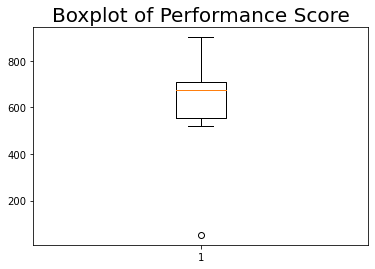

In [14]:
plt.boxplot(data1["performance_score"])
plt.title("Boxplot of Performance Score",fontsize=20)

In [15]:
# which means there is an outlier


In [18]:
q1,q2,q3 = np.percentile(data1['performance_score'],[25,50,75])
q1,q2,q3


(556.0, 674.0, 711.0)

In [19]:
IQR = q3-q1
IQR

155.0

In [20]:
low_lim = q1-(1.5*IQR)
up_lim = q3+(1.5*IQR)
print("lower = " ,low_lim)
print("upper = " ,up_lim)

lower =  323.5
upper =  943.5


In [23]:
outlier = []
for i in data1['performance_score']:
    if ((i>up_lim) or (i<low_lim)):
        outlier.append(i)
outlier        

[53]

In [24]:
index= data1['performance_score']<low_lim
data1.loc[index].index

Index(['James Authur'], dtype='object', name='name')

In [25]:
data1.drop('James Authur',inplace=True)

Text(0.5, 1.0, 'Boxplot of Performance Score')

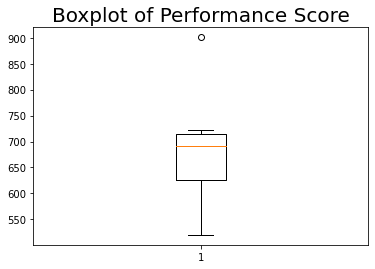

In [26]:
plt.boxplot(data1["performance_score"])
plt.title("Boxplot of Performance Score",fontsize=20)

In [27]:
# Now there is no outlier

# 9.check the gender column and do dummy encoding

In [28]:
data2=pd.get_dummies(data1,columns=['gender'],drop_first = True)
data2

,age,income,department,grade,performance_score,gender_M
name,,,,,,
Allen Smith,45.0,52857.142857,Operations,G3,723,0
S Kumar,45.0,16000.000000,Finance,G0,520,0
Jack Morgan,32.0,35000.000000,Finance,G2,674,1
Ying Chin,45.0,65000.000000,Sales,G3,556,0
Dheeraj Patel,30.0,42000.000000,Operations,G2,711,0
Satyam Sharma,45.0,62000.000000,Sales,G3,649,0
Josh Wills,54.0,52000.000000,Finance,G3,901,0
Leo Duck,23.0,98000.000000,Sales,G4,709,1


# 10.Do the standard scaling on the feature performance score.

In [29]:
column=['performance_score']
feature=data2[column]
scaler=StandardScaler().fit(feature.values)
feature=scaler.transform(feature.values)
data2[column]=feature
data2

,age,income,department,grade,performance_score,gender_M
name,,,,,,
Allen Smith,45.0,52857.142857,Operations,G3,0.392262,0
S Kumar,45.0,16000.000000,Finance,G0,-1.475872,0
Jack Morgan,32.0,35000.000000,Finance,G2,-0.058667,1
Ying Chin,45.0,65000.000000,Sales,G3,-1.144578,0
Dheeraj Patel,30.0,42000.000000,Operations,G2,0.281831,0
Satyam Sharma,45.0,62000.000000,Sales,G3,-0.288733,0
Josh Wills,54.0,52000.000000,Finance,G3,2.030331,0
Leo Duck,23.0,98000.000000,Sales,G4,0.263425,1
